# Decision Tree Figures
The objective of this notebooks is to generate figures for each decision tree using the default sklearn `plot_tree` function

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from joblib import load

## Claim Approval Tree

In [2]:
claims_pipe = load(r"./saved-models/decision-tree-claim-approval.joblib")
reject_pipe = load(r"./saved-models/decision-tree-reject-code.joblib")
pa_pipe = load(r"./saved-models/decision-tree-pa-approval.joblib")

In [6]:
reject_pipe['model'].classes_

array([70, 75, 76])

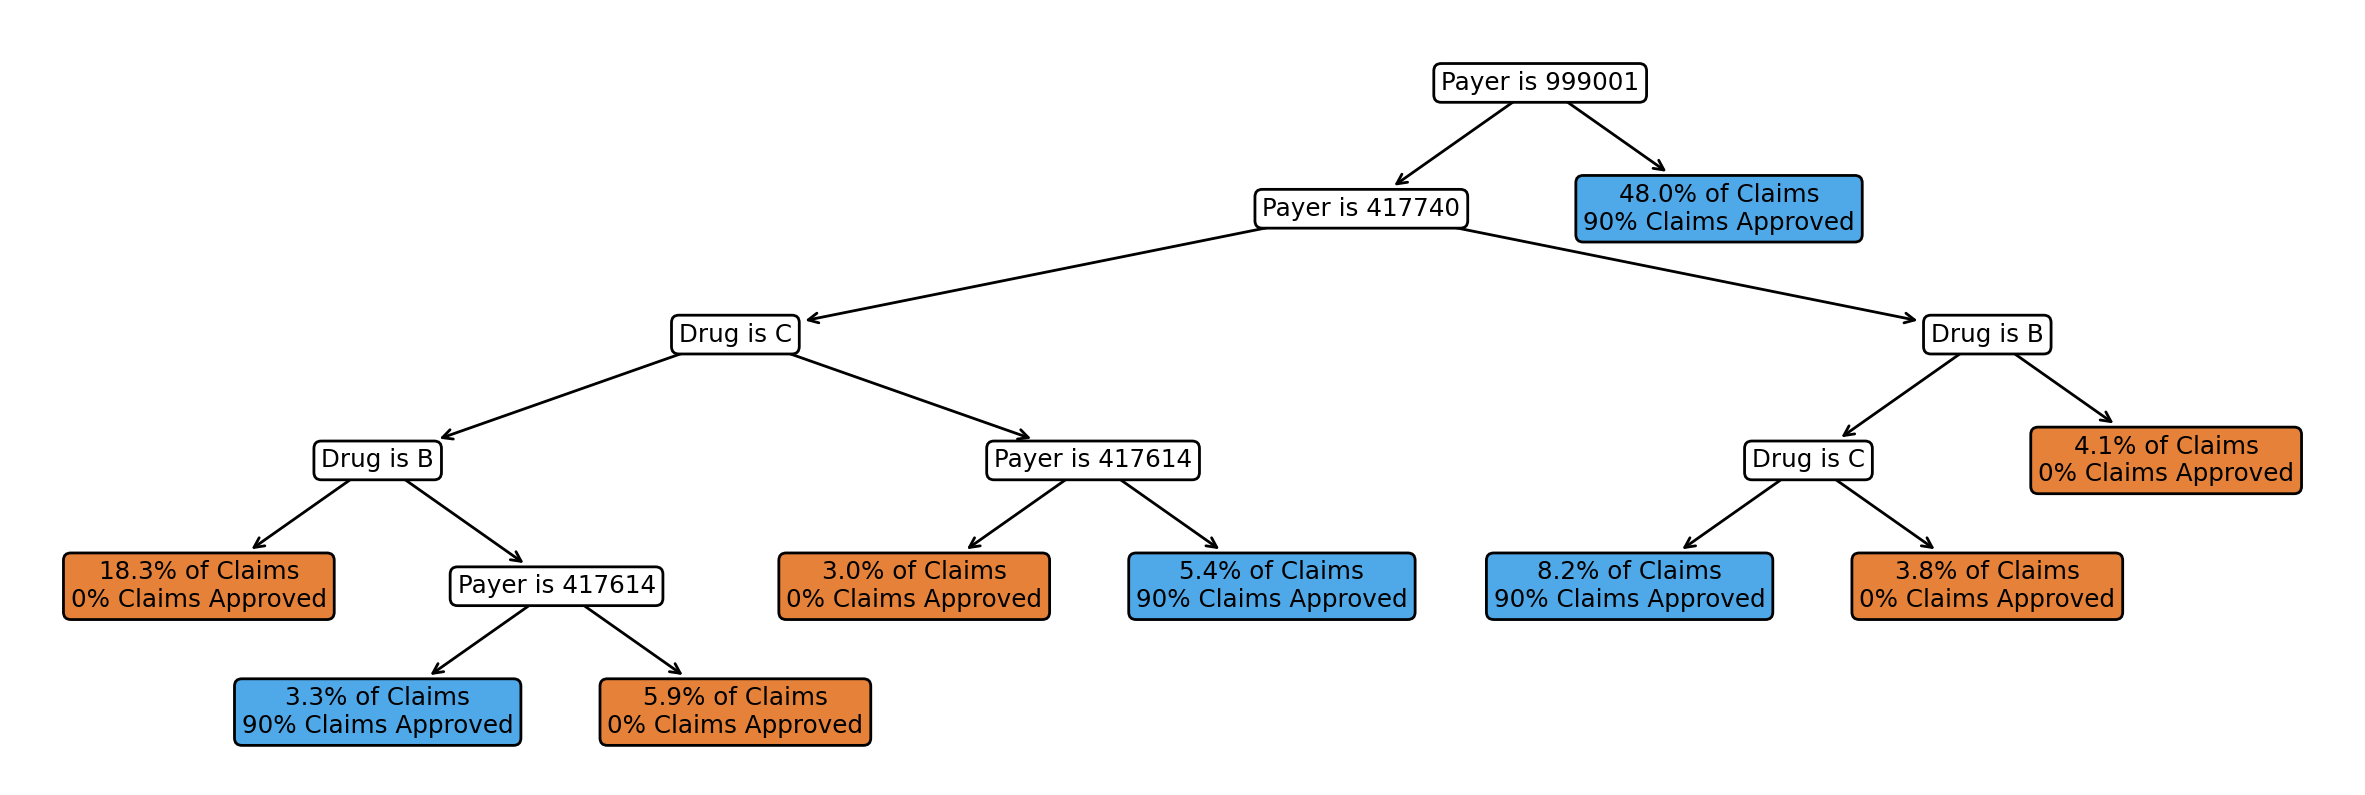

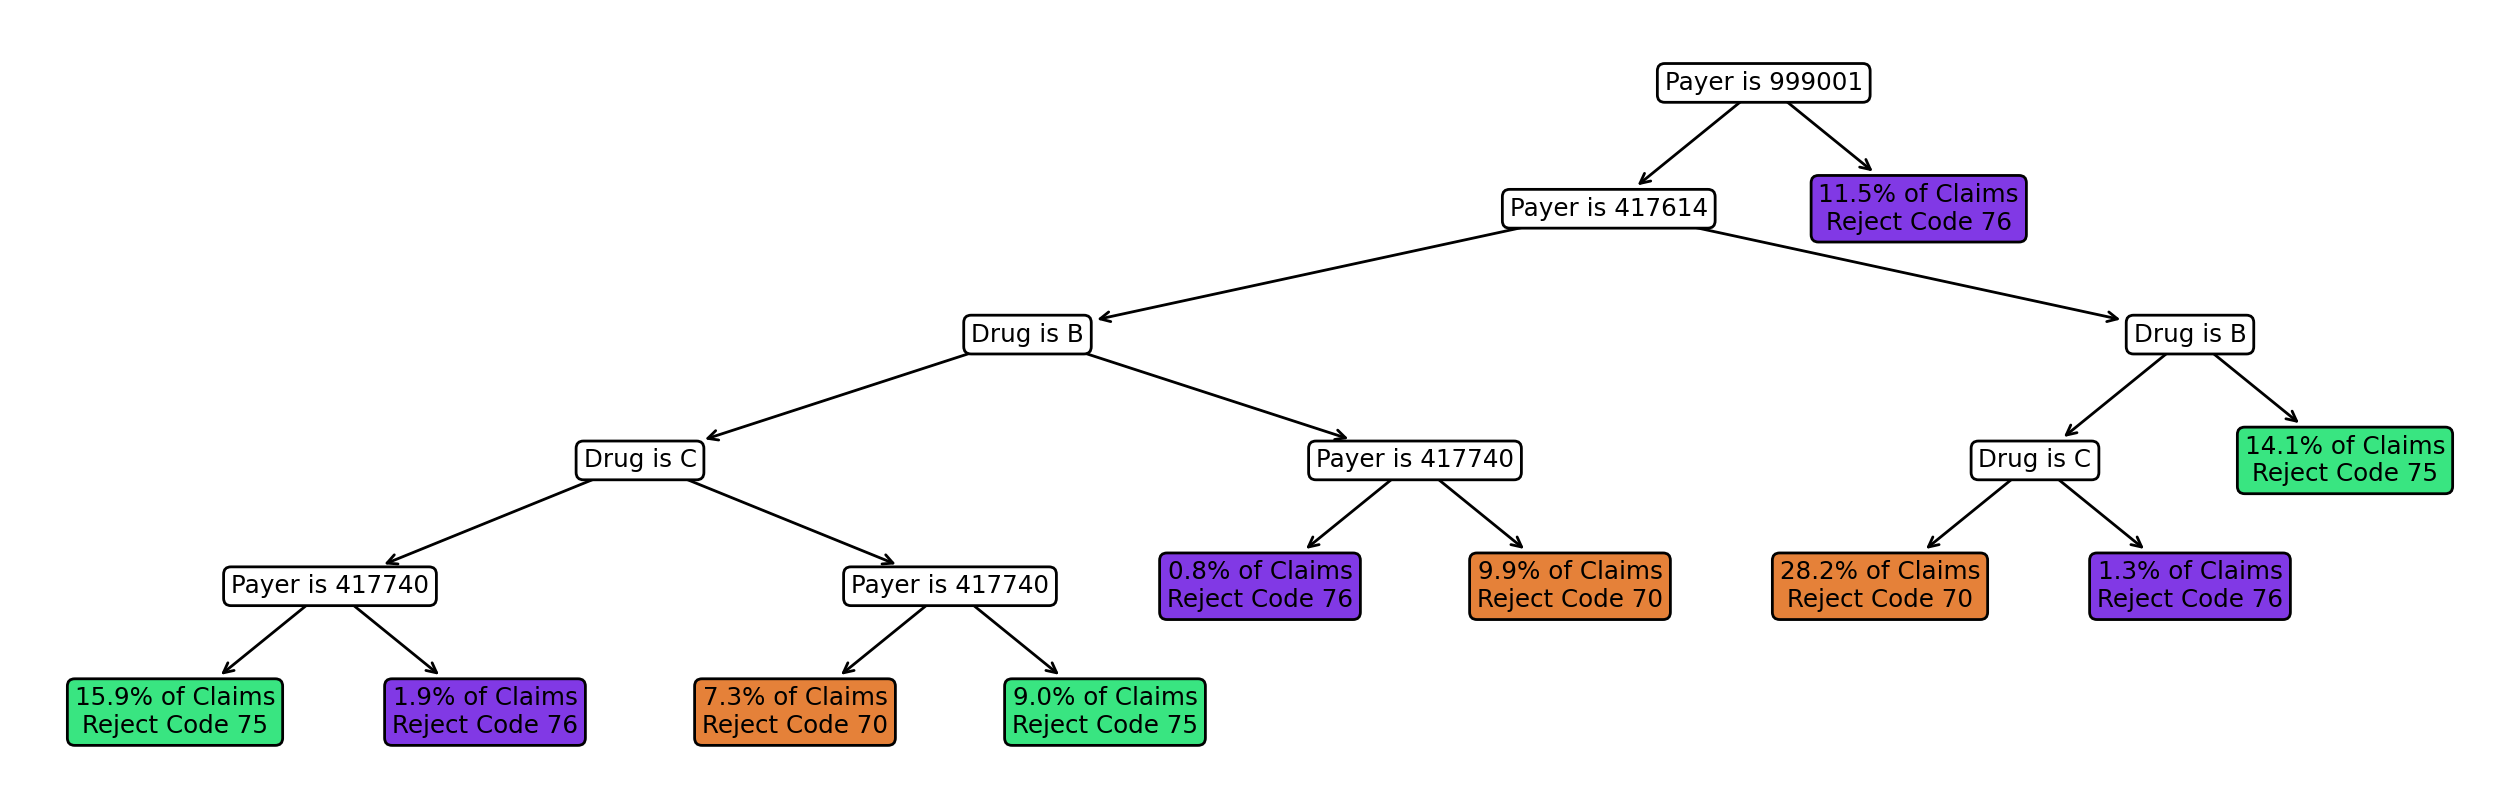

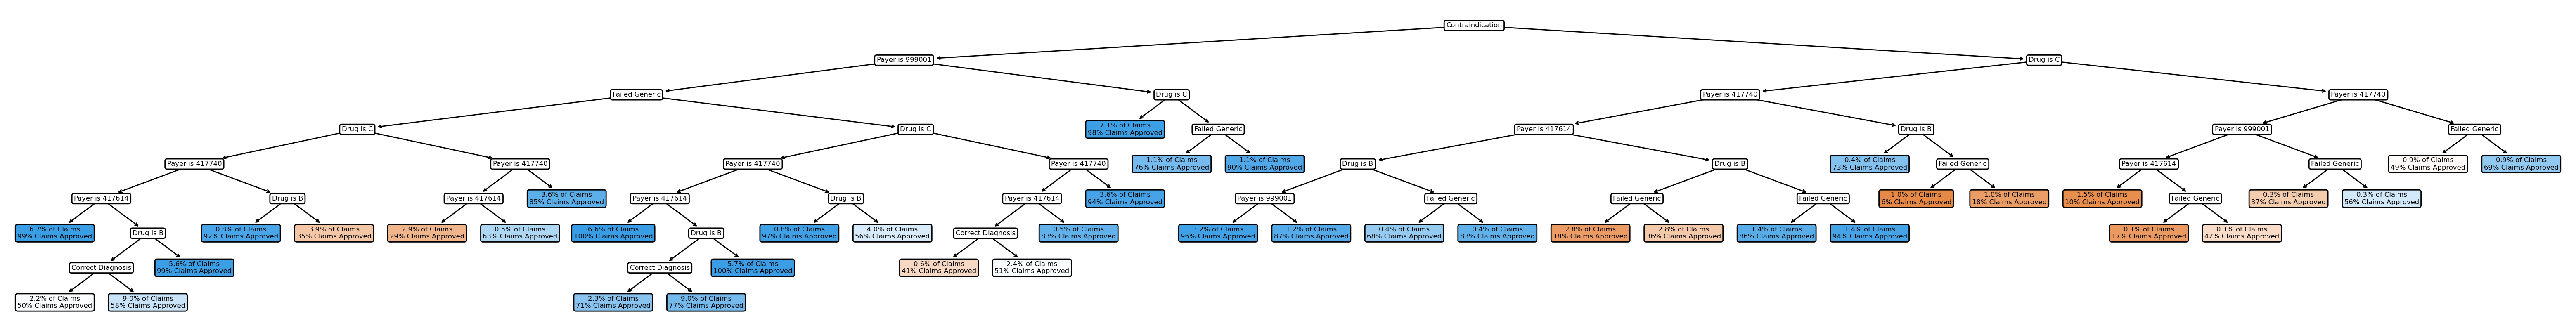

In [8]:
def polished_plot_tree(pipe, f, ax):
    feature_translation = {'X[0]': 'Payer is 417614',
                           'X[1]': 'Payer is 417740',
                           'X[2]': 'Payer is 999001',
                           'X[3]': 'Drug is B',
                           'X[4]': 'Drug is C',
                           'X[5]': 'Correct Diagnosis',
                           'X[6]': 'Failed Generic',
                           'X[7]': 'Contraindication'}
    names = [x.split('_')[1] for x in pipe['encoder'].get_feature_names()]
    components = plot_tree(pipe['model'], 
                           filled=True, 
                           rounded=True,
                           proportion=True,
                           impurity=False,
                           label='none',
                           class_names=pipe['model'].classes_.astype(str),
                           ax=ax)
    
    for component in components:
    
        rows = component.get_text().split('\n')
        if len(rows) == 4:
            # branch node
            rows = rows[:1]
            component.set_backgroundcolor('w')
        elif len(rows) == 3:
            rows = rows[:-1]
            pass
        for i, row in enumerate(rows):
            if '<=' in row:
                head = row.split(' <= ')[0]
                improved_row = feature_translation[head]
            elif '%' in row:
                improved_row = row + ' of Claims'
            elif '[' in row:
                probas = row[1:-1].split(", ")
                if len(probas) == 2:
                    percent_approved = round(100 * float(probas[1]))
                    improved_row = str(percent_approved) + '% Claims Approved'
                elif len(probas) == 3:
                    improved_row = 'Reject Code ' + str(reject_pipe['model'].classes_[np.argmax(probas)])
            rows[i] = improved_row
        improved_component = '\n'.join(rows)
        component.set_text(improved_component)    
    return f, ax, components

f, ax = plt.subplots(figsize=(15, 5), dpi=200)
f, ax, components = polished_plot_tree(claims_pipe, f, ax)

plt.savefig(r'./saved-model-figures/claim-approval-tree.png')
plt.show()

f, ax = plt.subplots(figsize=(16, 5), dpi=200)
f, ax, components = polished_plot_tree(reject_pipe, f, ax)

plt.savefig(r'./saved-model-figures/reject-code-tree.png')
plt.show()

f, ax = plt.subplots(figsize=(40, 5), dpi=200)
f, ax, components = polished_plot_tree(pa_pipe, f, ax)

plt.savefig(r'./saved-model-figures/pa-approval-tree.png')
plt.show()